In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
disease_df = pd.read_excel('TBT_02_updated_data.xlsx')

In [3]:
healthy_df = pd.read_excel('Himanshi_updated_data.xlsx')

In [4]:
disease_df.shape,healthy_df.shape

((33276, 46), (27886, 46))

In [5]:
data = pd.concat([disease_df,healthy_df])

In [6]:
data.tail()

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Recording media name,Recording media width,Recording media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Ungrouped,Disease
27881,304793536.0,538439893.0,Eye Tracker,Project1,17-05-2024,Hmanshi_Control_Subject_17_May,Recording002,17-05-2024,17-05-2024,10:24:45.973,...,fullstream.mp4,1920.0,1080.0,Fixation,190.0,721.0,961.0,569.0,NaN,0.0
27882,304803531.0,538449888.0,Eye Tracker,Project1,17-05-2024,Hmanshi_Control_Subject_17_May,Recording002,17-05-2024,17-05-2024,10:24:45.973,...,fullstream.mp4,1920.0,1080.0,Fixation,190.0,721.0,961.0,569.0,NaN,0.0
27883,304813523.0,538459880.0,Eye Tracker,Project1,17-05-2024,Hmanshi_Control_Subject_17_May,Recording002,17-05-2024,17-05-2024,10:24:45.973,...,fullstream.mp4,1920.0,1080.0,Fixation,190.0,721.0,961.0,569.0,NaN,0.0
27884,304823515.0,538469872.0,Eye Tracker,Project1,17-05-2024,Hmanshi_Control_Subject_17_May,Recording002,17-05-2024,17-05-2024,10:24:45.973,...,fullstream.mp4,1920.0,1080.0,Fixation,190.0,721.0,961.0,569.0,NaN,0.0
27885,304833505.0,538479862.0,Eye Tracker,Project1,17-05-2024,Hmanshi_Control_Subject_17_May,Recording002,17-05-2024,17-05-2024,10:24:45.973,...,fullstream.mp4,1920.0,1080.0,Fixation,190.0,721.0,961.0,569.0,NaN,0.0


In [7]:
data.columns

Index(['Recording timestamp', 'Computer timestamp', 'Sensor', 'Project name',
       'Export date', 'Participant name', 'Recording name', 'Recording date',
       'Recording date UTC', 'Recording start time',
       'Recording start time UTC', 'Recording duration',
       'Recording Fixation filter name', 'Event', 'Event value',
       'Gaze point X', 'Gaze point Y', 'Gaze point 3D X', 'Gaze point 3D Y',
       'Gaze point 3D Z', 'Gaze direction left X', 'Gaze direction left Y',
       'Gaze direction left Z', 'Gaze direction right X',
       'Gaze direction right Y', 'Gaze direction right Z',
       'Pupil position left X', 'Pupil position left Y',
       'Pupil position left Z', 'Pupil position right X',
       'Pupil position right Y', 'Pupil position right Z',
       'Pupil diameter left', 'Pupil diameter right', 'Validity left',
       'Validity right', 'Recording media name', 'Recording media width',
       'Recording media height', 'Eye movement type', 'Gaze event duration',
   

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61162 entries, 0 to 27885
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Recording timestamp             58666 non-null  float64
 1   Computer timestamp              58666 non-null  float64
 2   Sensor                          58666 non-null  object 
 3   Project name                    58666 non-null  object 
 4   Export date                     58666 non-null  object 
 5   Participant name                58666 non-null  object 
 6   Recording name                  58666 non-null  object 
 7   Recording date                  58666 non-null  object 
 8   Recording date UTC              58666 non-null  object 
 9   Recording start time            58666 non-null  object 
 10  Recording start time UTC        58666 non-null  object 
 11  Recording duration              58666 non-null  float64
 12  Recording Fixation filter name  58666

In [9]:
df = data.iloc[:,15:].drop(['Recording media name', 'Recording media width','Recording media height','Ungrouped','Validity left',
       'Validity right',],axis=1)

In [10]:
df.head()

,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,...,Pupil position right Y,Pupil position right Z,Pupil diameter left,Pupil diameter right,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Disease
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EyesNotFound,165.0,1.0,NaN,NaN,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EyesNotFound,165.0,1.0,NaN,NaN,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EyesNotFound,165.0,1.0,NaN,NaN,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EyesNotFound,165.0,1.0,NaN,NaN,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EyesNotFound,165.0,1.0,NaN,NaN,1.0


In [11]:
df.tail()

,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,...,Pupil position right Y,Pupil position right Z,Pupil diameter left,Pupil diameter right,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Disease
27881,960.0,573.0,-6.9084,-18.6143,395.3579,-0.08397,0.00971,0.99642,0.05391,-0.02036,...,-15.47,-31.51,4.034,4.243,Fixation,190.0,721.0,961.0,569.0,0.0
27882,960.0,574.0,-6.8635,-18.7157,391.0934,-0.08659,0.00648,0.99622,0.05601,-0.01701,...,-15.76,-31.49,3.974,4.236,Fixation,190.0,721.0,961.0,569.0,0.0
27883,960.0,574.0,-6.9156,-18.8225,390.3372,-0.08496,0.00939,0.99634,0.05453,-0.02114,...,-15.47,-31.51,4.025,4.225,Fixation,190.0,721.0,961.0,569.0,0.0
27884,959.0,575.0,-6.7966,-19.1360,391.1780,-0.08644,0.00545,0.99624,0.05618,-0.01795,...,-15.76,-31.49,3.959,4.220,Fixation,190.0,721.0,961.0,569.0,0.0
27885,959.0,575.0,-6.7055,-19.2701,391.6775,-0.08412,0.00851,0.99642,0.05478,-0.02230,...,-15.47,-31.50,3.999,4.209,Fixation,190.0,721.0,961.0,569.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61162 entries, 0 to 27885
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gaze point X             58649 non-null  float64
 1   Gaze point Y             58649 non-null  float64
 2   Gaze point 3D X          58649 non-null  float64
 3   Gaze point 3D Y          58649 non-null  float64
 4   Gaze point 3D Z          58649 non-null  float64
 5   Gaze direction left X    58649 non-null  float64
 6   Gaze direction left Y    58649 non-null  float64
 7   Gaze direction left Z    58649 non-null  float64
 8   Gaze direction right X   58649 non-null  float64
 9   Gaze direction right Y   58649 non-null  float64
 10  Gaze direction right Z   58649 non-null  float64
 11  Pupil position left X    58649 non-null  float64
 12  Pupil position left Y    58649 non-null  float64
 13  Pupil position left Z    58649 non-null  float64
 14  Pupil position right X   58

In [13]:
df['Eye movement type'].unique()

array(['EyesNotFound', 'Unclassified', 'Fixation', 'Saccade', nan],
      dtype=object)

In [14]:
valuesToEncode = {'Fixation':0, 'EyesNotFound':1, 'Saccade':2, 'Unclassified':3}

In [15]:
# df[['Eye movement type']].applymap(valuesToEncode)
df.drop(['Eye movement type','Gaze event duration','Eye movement type index'],axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61162 entries, 0 to 27885
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gaze point X            58649 non-null  float64
 1   Gaze point Y            58649 non-null  float64
 2   Gaze point 3D X         58649 non-null  float64
 3   Gaze point 3D Y         58649 non-null  float64
 4   Gaze point 3D Z         58649 non-null  float64
 5   Gaze direction left X   58649 non-null  float64
 6   Gaze direction left Y   58649 non-null  float64
 7   Gaze direction left Z   58649 non-null  float64
 8   Gaze direction right X  58649 non-null  float64
 9   Gaze direction right Y  58649 non-null  float64
 10  Gaze direction right Z  58649 non-null  float64
 11  Pupil position left X   58649 non-null  float64
 12  Pupil position left Y   58649 non-null  float64
 13  Pupil position left Z   58649 non-null  float64
 14  Pupil position right X  58649 non-null  flo

In [17]:
df['Gaze point X'].iloc[:1000]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
995    1102.0
996    1102.0
997    1102.0
998    1102.0
999    1102.0
Name: Gaze point X, Length: 1000, dtype: float64

In [18]:
df['Fixation point X'].fillna(df['Fixation point X'].mean(),inplace=True)
df['Fixation point Y'].fillna(df['Fixation point Y'].mean(),inplace=True)

In [19]:
df['Gaze point X'].fillna(df['Gaze point X'].mean(),inplace=True)
df['Gaze point Y'].fillna(df['Gaze point Y'].mean(),inplace=True)

In [20]:
df['Gaze point 3D X'].fillna(df['Gaze point 3D X'].mean(),inplace=True)
df['Gaze point 3D Y'].fillna(df['Gaze point 3D Y'].mean(),inplace=True)
df['Gaze point 3D Z'].fillna(df['Gaze point 3D Z'].mean(),inplace=True)
df['Gaze direction left X'].fillna(df['Gaze direction left X'].mean(),inplace=True)
df['Gaze direction left Y'].fillna(df['Gaze direction left Y'].mean(),inplace=True)
df['Gaze direction left Z'].fillna(df['Gaze direction left Z'].mean(),inplace=True)
df['Gaze direction right X'].fillna(df['Gaze direction right X'].mean(),inplace=True)
df['Gaze direction right Y'].fillna(df['Gaze direction right Y'].mean(),inplace=True)
df['Gaze direction right Z'].fillna(df['Gaze direction right Z'].mean(),inplace=True)
df['Pupil position left X'].fillna(df['Pupil position left X'].mean(),inplace=True)
df['Pupil position left Y'].fillna(df['Pupil position left Y'].mean(),inplace=True)
df['Pupil position left Z'].fillna(df['Pupil position left Z'].mean(),inplace=True)
df['Pupil position right X'].fillna(df['Pupil position right X'].mean(),inplace=True)
df['Pupil position right Y'].fillna(df['Pupil position right Y'].mean(),inplace=True)
df['Pupil position right Z'].fillna(df['Pupil position right Z'].mean(),inplace=True)
df['Pupil diameter left'].fillna(df['Pupil diameter left'].mean(),inplace=True)
df['Pupil diameter right'].fillna(df['Pupil diameter right'].mean(),inplace=True)
df['Disease'].fillna(df['Disease'].mean(),inplace=True)

In [21]:
df.isnull().sum()

Gaze point X              0
Gaze point Y              0
Gaze point 3D X           0
Gaze point 3D Y           0
Gaze point 3D Z           0
Gaze direction left X     0
Gaze direction left Y     0
Gaze direction left Z     0
Gaze direction right X    0
Gaze direction right Y    0
Gaze direction right Z    0
Pupil position left X     0
Pupil position left Y     0
Pupil position left Z     0
Pupil position right X    0
Pupil position right Y    0
Pupil position right Z    0
Pupil diameter left       0
Pupil diameter right      0
Fixation point X          0
Fixation point Y          0
Disease                   0
dtype: int64

In [22]:
df.drop(['Fixation point X','Fixation point Y'],axis=1,inplace=True)

In [23]:
df = df.sample(frac=1).reset_index(drop=True)

In [24]:
df.head(10)

,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Pupil position left X,Pupil position left Y,Pupil position left Z,Pupil position right X,Pupil position right Y,Pupil position right Z,Pupil diameter left,Pupil diameter right,Disease
0,986.0,725.0,-11.8946,-53.0859,295.2186,0.01522,0.18490,0.98264,0.05868,-0.11407,0.99174,30.78,-16.86,-36.06,-31.24,-15.46,-31.86,3.536,3.490,0.0
1,876.0,489.0,20.3915,9.4475,363.6293,-0.02443,0.07897,0.99658,0.12864,0.05317,0.99026,30.93,-17.23,-32.75,-30.95,-15.96,-31.07,3.182,3.425,0.0
2,1026.0,544.0,-48.2752,-13.9107,639.3869,-0.11169,0.00201,0.99374,-0.03363,0.03017,0.99898,29.61,-24.68,-23.20,-29.32,-24.54,-24.29,3.205,3.203,1.0
3,1097.0,416.0,-91.0707,59.5265,663.5567,-0.17039,0.11191,0.97900,-0.08979,0.12758,0.98776,29.46,-24.26,-23.07,-29.58,-23.98,-24.35,3.114,3.045,1.0
4,1070.0,516.0,-44.6482,1.2887,391.2511,-0.17240,0.04868,0.98382,-0.03138,0.03325,0.99895,29.92,-17.02,-32.84,-31.65,-15.43,-31.60,3.466,3.598,0.0
5,870.0,441.0,29.5202,32.9039,481.2555,-0.00050,0.09565,0.99542,0.64797,-0.34038,0.68138,30.31,-16.98,-32.50,-34.82,-17.82,-24.76,3.418,2.629,0.0
6,851.0,528.0,26.2536,-2.7112,336.9000,-0.01010,0.05404,0.99849,0.14994,0.01898,0.98851,31.26,-16.99,-33.23,-30.93,-15.54,-31.59,3.499,3.641,0.0
7,1103.0,473.0,-62.4648,17.5467,438.1270,-0.19164,0.07457,0.97863,-0.06656,0.06314,0.99578,29.83,-17.01,-32.77,-31.61,-15.72,-31.19,3.437,3.547,0.0
8,1000.0,519.0,-25.0486,0.2680,476.7529,-0.10971,0.04799,0.99280,0.00823,0.04985,0.99872,30.31,-24.36,-23.72,-29.13,-24.35,-24.22,3.618,3.405,1.0
9,885.0,505.0,15.1857,3.8539,315.2512,-0.04171,0.07653,0.99619,0.12860,0.04013,0.99088,30.94,-17.29,-32.72,-31.04,-15.78,-31.35,3.258,3.439,0.0


In [25]:
df['Disease'] = df['Disease'].astype(int)

In [26]:
X = df.iloc[:,:-1]
y = df['Disease']

In [27]:
X.head()

,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Pupil position left X,Pupil position left Y,Pupil position left Z,Pupil position right X,Pupil position right Y,Pupil position right Z,Pupil diameter left,Pupil diameter right
0,986.0,725.0,-11.8946,-53.0859,295.2186,0.01522,0.18490,0.98264,0.05868,-0.11407,0.99174,30.78,-16.86,-36.06,-31.24,-15.46,-31.86,3.536,3.490
1,876.0,489.0,20.3915,9.4475,363.6293,-0.02443,0.07897,0.99658,0.12864,0.05317,0.99026,30.93,-17.23,-32.75,-30.95,-15.96,-31.07,3.182,3.425
2,1026.0,544.0,-48.2752,-13.9107,639.3869,-0.11169,0.00201,0.99374,-0.03363,0.03017,0.99898,29.61,-24.68,-23.20,-29.32,-24.54,-24.29,3.205,3.203
3,1097.0,416.0,-91.0707,59.5265,663.5567,-0.17039,0.11191,0.97900,-0.08979,0.12758,0.98776,29.46,-24.26,-23.07,-29.58,-23.98,-24.35,3.114,3.045
4,1070.0,516.0,-44.6482,1.2887,391.2511,-0.17240,0.04868,0.98382,-0.03138,0.03325,0.99895,29.92,-17.02,-32.84,-31.65,-15.43,-31.60,3.466,3.598


In [28]:
y

0        0
1        0
2        1
3        1
4        0
        ..
61157    1
61158    0
61159    1
61160    1
61161    0
Name: Disease, Length: 61162, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75)

In [31]:
X_train.shape

(45871, 19)

In [32]:
X_test.shape

(15291, 19)

In [33]:
y_train

14631    0
26644    0
15657    0
15063    1
8749     0
        ..
37094    1
2482     1
59772    1
8497     0
4312     0
Name: Disease, Length: 45871, dtype: int32

# Support Vector Machine(SVM)

In [34]:
from sklearn.svm import SVC

In [35]:
svc = SVC()

In [36]:
svc.fit(X_train,y_train)

SVC()

In [37]:
pred = svc.predict(X_test)

In [38]:
pred

array([1, 1, 1, ..., 0, 1, 1])

In [39]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,ConfusionMatrixDisplay

In [40]:
accuracy = accuracy_score(pred,y_test)

In [41]:
accuracy*100

97.14210973775424

In [42]:
svc_recall = recall_score(y_test,pred)
print(svc_recall)

0.9993678887484198


In [43]:
cm =confusion_matrix(y_test,pred)

In [44]:
svc.classes_

array([0, 1])

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svc.classes_)

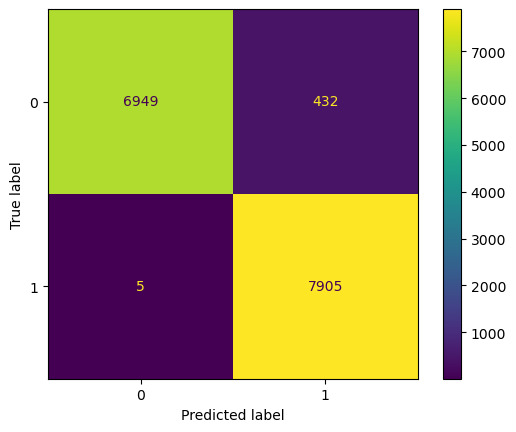

In [46]:
disp.plot()

# Precision Recall Curve

# The PR-curve requires precision-recall to be calculated, and for that we need probabilities of the predictions.

# Support Vector Classifier (SVC)

In [47]:
svc = SVC(probability=True)
svc.fit(X_train,y_train)

svc_preds = svc.predict(X_test) # Predictions
svc_prob = svc.predict_proba(X_test)[:,1] 

# THIS WILL BE USED FOR PR-CURVE

In [48]:
svc_prob

array([9.99998931e-01, 9.99999977e-01, 2.93608157e-01, ...,
       2.09167591e-05, 9.99999997e-01, 9.99999998e-01])

In [49]:
accuracy = accuracy_score(y_test,svc_preds)
print(f'Accuracy : {round(accuracy*100,2)}%')

Accuracy : 97.14%


In [50]:
from sklearn.metrics import accuracy_score,precision_recall_curve,auc

In [51]:
precision_1,recall_1,threshold_1 = precision_recall_curve(y_test,svc_prob)

# This is Area Under Curve (AUC) which measures the performance of the model.
# Higher AUC means better model.
# range of AUC is 0 to 1

In [52]:
auc_1= auc(recall_1,precision_1)
print(auc_1)

0.9992006966715368


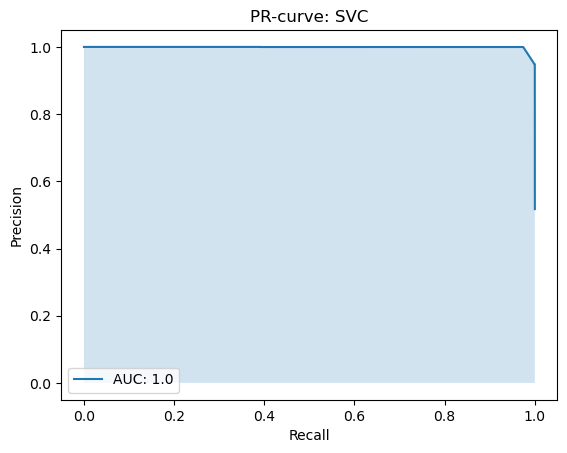

In [53]:
plt.title('PR-curve: SVC')

plt.plot(recall_1,precision_1,label=f'AUC: {round(auc_1,2)}')

plt.fill_between(recall_1,precision_1,alpha=0.2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [54]:
df[df['Disease']==1]

,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Pupil position left X,Pupil position left Y,Pupil position left Z,Pupil position right X,Pupil position right Y,Pupil position right Z,Pupil diameter left,Pupil diameter right,Disease
2,1026.0,544.0,-48.2752,-13.9107,639.3869,-0.11169,0.00201,0.99374,-0.03363,0.03017,0.99898,29.61,-24.68,-23.20,-29.32,-24.54,-24.29,3.205,3.203,1
3,1097.0,416.0,-91.0707,59.5265,663.5567,-0.17039,0.11191,0.97900,-0.08979,0.12758,0.98776,29.46,-24.26,-23.07,-29.58,-23.98,-24.35,3.114,3.045,1
8,1000.0,519.0,-25.0486,0.2680,476.7529,-0.10971,0.04799,0.99280,0.00823,0.04985,0.99872,30.31,-24.36,-23.72,-29.13,-24.35,-24.22,3.618,3.405,1
11,991.0,478.0,-35.6496,29.0839,801.3521,-0.07889,0.06463,0.99479,-0.01515,0.07994,0.99668,29.76,-24.47,-23.11,-29.27,-24.18,-24.45,3.320,3.275,1
15,1028.0,417.0,-106.9984,124.3168,1391.3270,-0.09539,0.10184,0.99022,-0.05464,0.10570,0.99290,29.59,-23.99,-23.25,-29.39,-23.66,-24.57,3.181,3.129,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61155,1000.0,490.0,-28.5221,13.9714,542.7061,-0.10118,0.06048,0.99303,0.00107,0.07454,0.99722,29.71,-24.68,-22.93,-29.65,-24.20,-24.60,3.098,3.163,1
61156,995.0,525.0,-39.1759,-4.1814,812.0294,-0.08231,0.02271,0.99635,-0.01195,0.02569,0.99960,29.90,-24.51,-23.59,-29.25,-24.43,-24.37,3.167,3.064,1
61157,1075.0,564.0,-90.1673,-29.7303,761.5046,-0.15040,-0.01023,0.98857,-0.07742,-0.00253,0.99700,29.58,-24.73,-23.50,-29.50,-24.68,-24.16,3.234,3.187,1
61159,1007.0,462.0,-28.3935,24.0420,483.4341,-0.11366,0.07389,0.99077,0.00242,0.09945,0.99504,29.75,-24.68,-22.98,-29.75,-23.95,-24.95,3.167,3.200,1


# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier(max_depth=5,min_samples_split=200)

In [57]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=200)

In [58]:
rfc_pred = rfc.predict(X_test)

In [59]:
rfc_accuracy = accuracy_score(y_test,rfc_pred)

In [60]:
rfc_accuracy*100

98.71166045386175

In [61]:
rfc_recall = recall_score(y_test,rfc_pred)
print(rfc_recall)

0.975094816687737


In [62]:
cm = confusion_matrix(y_test,rfc_pred)

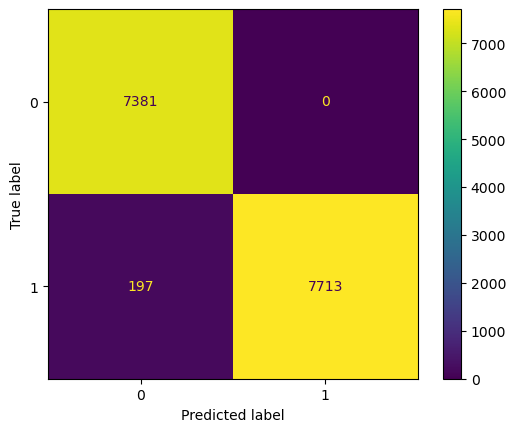

In [63]:
# plt.title('Random Forest Classifier')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfc.classes_)
disp.plot()
plt.show()

In [64]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

rfc_preds = rfc.predict(X_test) # Predictions
rfc_prob = rfc.predict_proba(X_test)[:,1] 

# THIS WILL BE USED FOR PR-CURVE

In [65]:
rfc_prob

array([1.        , 1.        , 0.26950724, ..., 0.        , 1.        ,
       1.        ])

In [66]:
accuracy = accuracy_score(y_test,rfc_preds)
print(f'Accuracy : {round(accuracy*100,2)}%')

Accuracy : 98.71%


In [67]:
precision_2,recall_2,threshold_2 = precision_recall_curve(y_test,rfc_prob)

In [68]:
auc_2 =auc(recall_2,precision_2)  
print(auc_2)

0.999360792848546


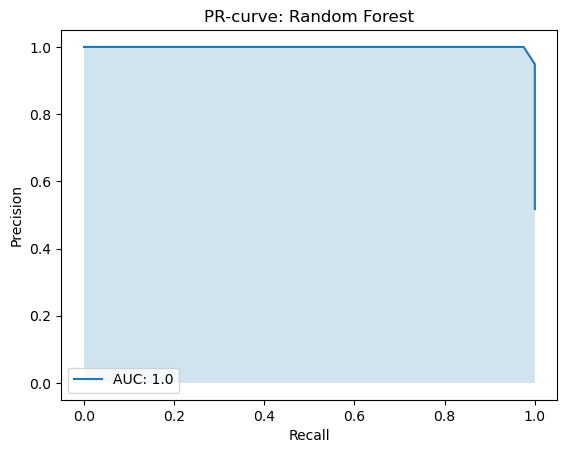

In [69]:
plt.title('PR-curve: Random Forest')

plt.plot(recall_2,precision_2,label=f'AUC: {round(auc_2,2)}')

plt.fill_between(recall_2,precision_2,alpha=0.2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
gbc = GradientBoostingClassifier(learning_rate=0.01)

In [72]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [73]:
gbc_pred = gbc.predict(X_test)

In [74]:
gbc_accuracy = accuracy_score(y_test,gbc_pred)
gbc_recall = recall_score(y_test,gbc_pred)

In [75]:
gbc_accuracy*100

98.71166045386175

In [76]:
gbc_recall

0.975094816687737

In [77]:
cm = confusion_matrix(y_test,gbc_pred)

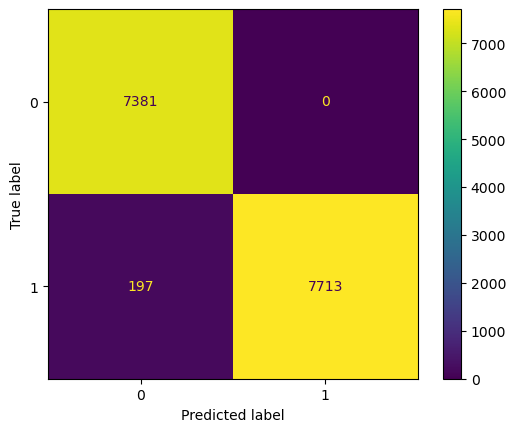

In [78]:
# plt.title('GradientBoosting')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gbc.classes_)
disp.plot()
plt.show()

In [79]:
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train,y_train)

grad_boost_preds = grad_boost.predict(X_test) # Predictions
grad_boost_prob = grad_boost.predict_proba(X_test)[:,1] 

# THIS WILL BE USED FOR PR-CURVE

In [80]:
grad_boost_prob

array([9.99978666e-01, 9.99978666e-01, 2.71192964e-01, ...,
       2.24671254e-05, 9.99978666e-01, 9.99978666e-01])

In [81]:
accuracy = accuracy_score(y_test,grad_boost_preds)
print(f'Accuracy : {round(accuracy*100,2)}%')

Accuracy : 98.71%


In [82]:
precision_3,recall_3,threshold_3 = precision_recall_curve(y_test,grad_boost_prob)

In [83]:
auc_3 =auc(recall_3,precision_3)  
print(auc_3)

0.999360792848546


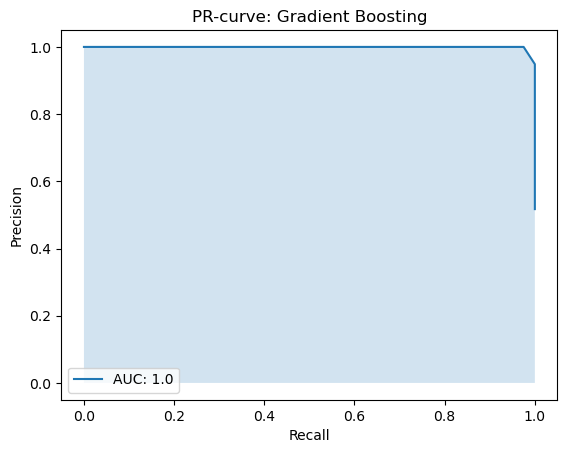

In [84]:
plt.title('PR-curve: Gradient Boosting')

plt.plot(recall_3,precision_3,label=f'AUC: {round(auc_3,2)}')

plt.fill_between(recall_3,precision_3,alpha=0.2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# Logistic Regression (LR)

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
logit = LogisticRegression(penalty = 'l1', solver='liblinear')

In [87]:
logit.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [88]:
logit_pred = logit.predict(X_test)

In [89]:
logit_accuracy = accuracy_score(y_test,logit_pred)
logit_recall = recall_score(y_test,logit_pred)

In [90]:
logit_accuracy*100

98.71166045386175

In [91]:
logit_recall

0.975094816687737

In [92]:
cm = confusion_matrix(y_test,logit_pred)

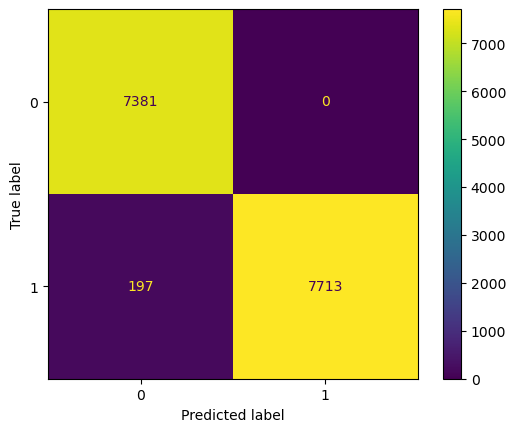

In [93]:
# plt.title('Logistic Regression')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logit.classes_)
disp.plot()
plt.show()

In [94]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train,y_train)

log_reg_preds = log_reg.predict(X_test) # Predictions
log_reg_prob = log_reg.predict_proba(X_test)[:,1] 

# THIS WILL BE USED FOR PR-CURVE 

In [95]:
log_reg_prob

array([9.99768770e-01, 9.99936226e-01, 2.74058708e-01, ...,
       4.26991849e-06, 9.99917230e-01, 9.99933749e-01])

In [96]:
accuracy = accuracy_score(y_test,log_reg_preds)
print(f'Accuracy : {round(accuracy*100,2)}%')

Accuracy : 98.71%


In [97]:
precision_4,recall_4,threshold_4 = precision_recall_curve(y_test,log_reg_prob)

In [98]:
auc_4 =auc(recall_4,precision_4)  
print(auc_4)

0.999360792848546


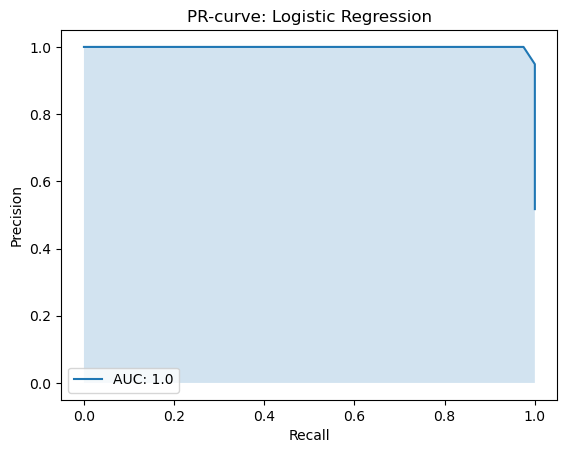

In [99]:
plt.title('PR-curve: Logistic Regression')

plt.plot(recall_4,precision_4,label=f'AUC: {round(auc_4,2)}')

plt.fill_between(recall_4,precision_4,alpha=0.2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# MODEL PERFORMANCE

# ==> Comparing all four charts/plots

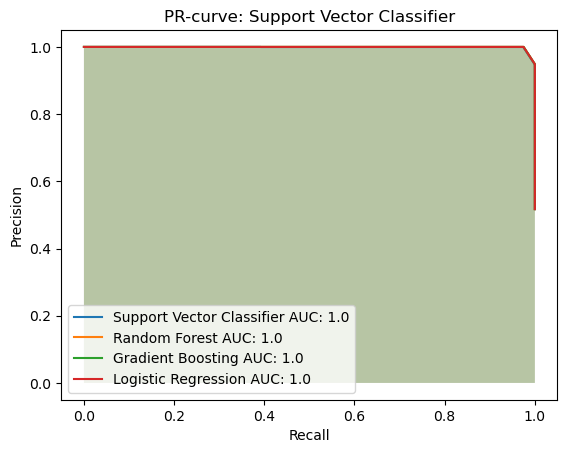

In [100]:
plt.title('PR-curve: Support Vector Classifier')
# Support Vector Classifier
plt.plot(recall_1,precision_1,label=f'Support Vector Classifier AUC: {round(auc_1,2)}')
plt.fill_between(recall_1,precision_1,alpha=0.2)


# Random Forest
plt.plot(recall_2,precision_2,label=f'Random Forest AUC: {round(auc_2,2)}')
plt.fill_between(recall_2,precision_2,alpha=0.2)

# Gradient Boosting
plt.plot(recall_3,precision_3,label=f'Gradient Boosting AUC: {round(auc_3,2)}')
plt.fill_between(recall_3,precision_3,alpha=0.2)

# Logistic Regression
plt.plot(recall_4,precision_4,label=f'Logistic Regression AUC: {round(auc_4,2)}')

# plt.fill_between(recall_1,precision_1,alpha=0.2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()